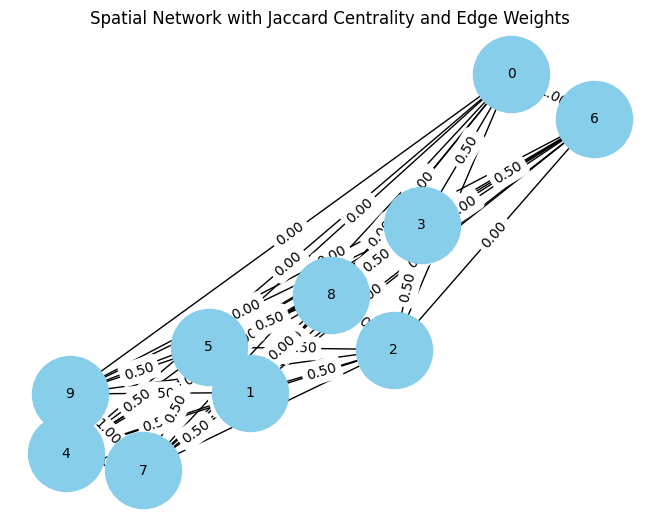

In [ ]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from shapely.geometry import Polygon

# Generate example data: Random polygons with random attributes
np.random.seed(0)
num_polygons = 10
polygon_data = {
    'geometry': [Polygon(np.random.rand(5, 2)) for _ in range(num_polygons)],
    'attribute': [set(np.random.choice(['A', 'B', 'C'], size=np.random.randint(1, 4))) for _ in range(num_polygons)]
}
polygon_map = gpd.GeoDataFrame(polygon_data)

# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to calculate edge weights (Jaccard similarity) between all pairs of polygons
def calculate_edge_weights(df):
    weights = {}
    for i, j in combinations(df.index, 2):
        weight = jaccard_similarity(df.loc[i]['attribute'], df.loc[j]['attribute'])
        weights[(i, j)] = weight
        weights[(j, i)] = weight
    return weights

# Calculate edge weights (Jaccard similarity) between polygons
edge_weights = calculate_edge_weights(polygon_map)

# Calculate Jaccard centrality for each node
G = nx.Graph()
for i, row in polygon_map.iterrows():
    G.add_node(i, jaccard_centrality=row['attribute'])

# Add edges with calculated weights
for (u, v), weight in edge_weights.items():
    G.add_edge(u, v, weight=weight)

# Draw the network
pos = nx.spring_layout(G)  # Layout the nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)
# Draw edge labels with weights
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Spatial Network with Jaccard Centrality and Edge Weights')
plt.show()


In [ ]:
polygon_data

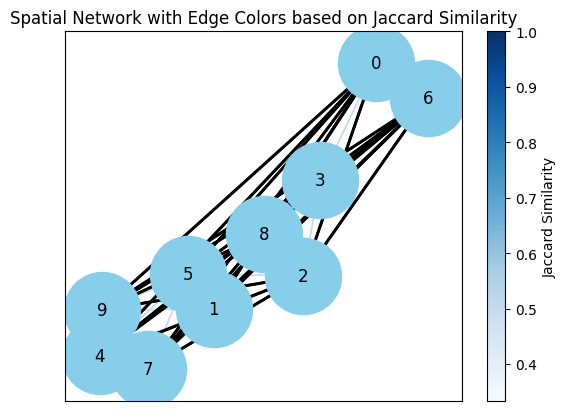

In [ ]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from shapely.geometry import Polygon

# Generate example data: Random polygons with random attributes
np.random.seed(0)
num_polygons = 10
polygon_data = {
    'geometry': [Polygon(np.random.rand(5, 2)) for _ in range(num_polygons)],
    'attribute': [set(np.random.choice(['A', 'B', 'C'], size=np.random.randint(1, 4))) for _ in range(num_polygons)]
}
polygon_map = gpd.GeoDataFrame(polygon_data)

# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to calculate edge weights (Jaccard similarity) between all pairs of polygons
def calculate_edge_weights(df):
    weights = {}
    for i, j in combinations(df.index, 2):
        weight = jaccard_similarity(df.loc[i]['attribute'], df.loc[j]['attribute'])
        weights[(i, j)] = weight
        weights[(j, i)] = weight
    return weights

# Calculate edge weights (Jaccard similarity) between polygons
edge_weights = calculate_edge_weights(polygon_map)

# Calculate Jaccard centrality for each node
G = nx.Graph()
for i, row in polygon_map.iterrows():
    G.add_node(i, jaccard_centrality=row['attribute'])

# Add edges with calculated weights
for (u, v), weight in edge_weights.items():
    G.add_edge(u, v, weight=weight)

# Draw the network
pos = nx.spring_layout(G)  # Layout the nodes using the spring layout algorithm
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_labels(G, pos)

# Separate zero-weight edges
zero_weight_edges = [(u, v) for (u, v), weight in edge_weights.items() if weight == 0]
non_zero_edge_weights = {key: value for key, value in edge_weights.items() if value != 0}

# Draw non-zero-weight edges with colors based on edge weights
edges = nx.draw_networkx_edges(G, pos, edgelist=non_zero_edge_weights.keys(), edge_color=list(non_zero_edge_weights.values()), edge_cmap=plt.cm.Blues)
# Draw zero-weight edges separately with black color
nx.draw_networkx_edges(G, pos, edgelist=zero_weight_edges, edge_color='black', width=2)

# Add color bar for non-zero edge weights
plt.colorbar(edges, label='Jaccard Similarity')
plt.title('Spatial Network with Edge Colors based on Jaccard Similarity')
plt.show()


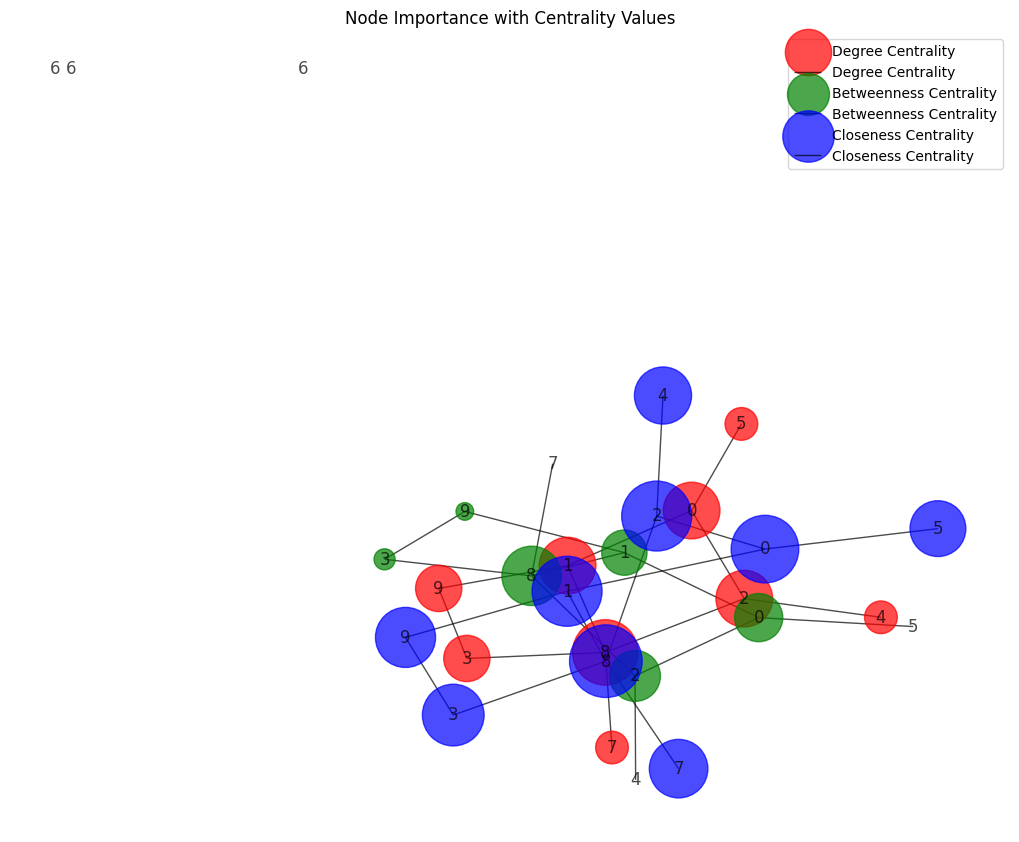

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a random graph as an example
G = nx.erdos_renyi_graph(n=10, p=0.3)

# Calculate centrality measures for nodes
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize the graph with node sizes representing centrality values
plt.figure(figsize=(10, 8))

# Degree centrality
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, nodelist=degree_centrality.keys(),
        node_size=[v * 5000 for v in degree_centrality.values()], node_color='r', alpha=0.7, label='Degree Centrality')

# Betweenness centrality
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, nodelist=betweenness_centrality.keys(),
        node_size=[v * 5000 for v in betweenness_centrality.values()], node_color='g', alpha=0.7, label='Betweenness Centrality')

# Closeness centrality
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, nodelist=closeness_centrality.keys(),
        node_size=[v * 5000 for v in closeness_centrality.values()], node_color='b', alpha=0.7, label='Closeness Centrality')

plt.title('Node Importance with Centrality Values')
plt.legend()
plt.show()
